In [1]:
import re
from google_play_scraper import Sort, reviews
import pandas as pd
from itertools import chain
import json

In [2]:
url = 'https://play.google.com/store/apps/details?id=com.herzick.houseparty&hl=en_US&showAllReviews=true&showAllReviews=true'
p = re.compile(".+\\bdetails\\?id=([^&]+)")
result = p.search(url)

appid = result.group(1)

In [3]:
#test
result, continuation_token = reviews(
    'com.herzick.houseparty',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=3, # defaults to 100
    filter_score_with=5 # defaults to None(means all score)
    )



In [4]:
def get_review(url_string):
    p = re.compile(".+\\bdetails\\?id=([^&]+)")
    result = p.search(url_string)
    appid = result.group(1)
    
    result, continuation_token = reviews(
    appid,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=100, # defaults to 100
    #filter_score_with=5 # defaults to None(means all score)
    )
    
    #dataframe for app reviews
    '''
    df_app = pd.DataFrame(result)
    
    #drop stuff you don't need
    del df_app['userImage']
    del df_app['reviewCreatedVersion']
    del df_app['repliedAt']
    del df_app['replyContent']
    del df_app['userName']
    df_app.columns = ['at', 'content', 'score', 'thumbsUpCount']
    
    print(df_app)
    return df_app
    '''
    
    for element in result:
        element['appId'] = appid
        
    return result
    
    
    
    

In [5]:
#opening the appsid file
#extract appids from urls

try:
    with open('appsid', 'r') as aid:
        urls = aid.readline().split(',')

except IOError:
    print('Error while opening App\'s ID file. make sure that\
    you have a file named "appsid" in the irectory of this\
    scrip and you have right permissions to access file. \nExiting...')
    
length = len(urls)
#master dataframe
columns = ['at', 'content', 'score', 'thumbsUpCount']

app_data_list = []


while length:
    try:
        for url in urls:
            app_data = get_review(url.strip('\"'))
            app_data_list.append(app_data)
            print(str(length) + ' apps left')
            length -= 1
    except IOError as e:
        print('Operation Failed Error...')
        pass
    




79 apps left
78 apps left
77 apps left
76 apps left
75 apps left
74 apps left
73 apps left
72 apps left
71 apps left
70 apps left
69 apps left
68 apps left
67 apps left
66 apps left
65 apps left
64 apps left
63 apps left
62 apps left
61 apps left
60 apps left
59 apps left
58 apps left
57 apps left
56 apps left
55 apps left
54 apps left
53 apps left
52 apps left
51 apps left
50 apps left
49 apps left
48 apps left
47 apps left
46 apps left
45 apps left
44 apps left
43 apps left
42 apps left
41 apps left
40 apps left
39 apps left
38 apps left
37 apps left
36 apps left
35 apps left
34 apps left
33 apps left
32 apps left
31 apps left
30 apps left
29 apps left
28 apps left
27 apps left
26 apps left
25 apps left
24 apps left
23 apps left
22 apps left
21 apps left
20 apps left
19 apps left
18 apps left
17 apps left
16 apps left
15 apps left
14 apps left
13 apps left
12 apps left
11 apps left
10 apps left
9 apps left
8 apps left
7 apps left
6 apps left
5 apps left
4 apps left
3 apps left
2 apps

In [6]:
df = pd.DataFrame(list(chain.from_iterable(app_data_list)))
display(df)

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appId
0,Vadra08,https://lh3.googleusercontent.com/a-/AOh14Gho7...,I like it so far! It is a great app to use dur...,4,57,1.41.1,2020-05-03 17:24:25,None,NaT,com.herzick.houseparty
1,daniel anderson,https://lh3.googleusercontent.com/a-/AOh14GjJU...,I have the OnePlus 7 Pro phone which features ...,2,105,1.41.1,2020-05-02 20:22:45,None,NaT,com.herzick.houseparty
2,Eleanor Cesseli,https://lh3.googleusercontent.com/a-/AOh14GikU...,"This is a great app, great concept, my only co...",3,63,1.42.2,2020-05-03 09:15:54,None,NaT,com.herzick.houseparty
3,Jenna Sheppleman,https://lh3.googleusercontent.com/a-/AOh14GhCz...,It is a very useful and wonderful app over all...,4,1,1.40.1,2020-05-03 21:36:52,None,NaT,com.herzick.houseparty
4,Ross Meegan,https://lh3.googleusercontent.com/a-/AOh14Ghqn...,"Certain parts of this are great, the concept a...",3,169,1.41.1,2020-04-20 00:03:48,None,NaT,com.herzick.houseparty
...,...,...,...,...,...,...,...,...,...,...
7868,Cliff,https://lh3.googleusercontent.com/-RP2Ee5S2cQg...,Having installed several Arlo cams for many ye...,1,4,2.15_27085,2020-04-19 16:17:15,None,NaT,com.arlo.app
7869,Jeff Simpson,https://lh3.googleusercontent.com/-vw_RK6HUN2c...,Several times I have received notifications th...,2,1,2.15_27085,2020-04-24 10:47:55,None,NaT,com.arlo.app
7870,David Coignet,https://lh3.googleusercontent.com/a-/AOh14Gi_S...,Cant believe I bought this. The reaction time ...,1,2,2.15_27085,2020-04-24 01:19:27,None,NaT,com.arlo.app
7871,Jeff Bathke,https://lh3.googleusercontent.com/a-/AOh14Gh25...,We've used one Arlo Pro 2 for about 1.5 years....,3,0,2.15_27085,2020-04-22 22:25:39,None,NaT,com.arlo.app


In [7]:
#drop stuff you don't need 

del df['userImage']
del df['reviewCreatedVersion']
del df['repliedAt']
del df['replyContent']
del df['userName']
del df["thumbsUpCount"]
del df["at"]

In [8]:
df.head()

,content,score,appId
0,I like it so far! It is a great app to use dur...,4,com.herzick.houseparty
1,I have the OnePlus 7 Pro phone which features ...,2,com.herzick.houseparty
2,"This is a great app, great concept, my only co...",3,com.herzick.houseparty
3,It is a very useful and wonderful app over all...,4,com.herzick.houseparty
4,"Certain parts of this are great, the concept a...",3,com.herzick.houseparty


In [9]:
y = df["score"]
X = df.drop("score",axis =1,inplace=False)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
df_train=pd.concat([X,y],axis=1).iloc[X_train] # return dataframe train
df_test=pd.concat([X,y],axis=1).iloc[X_test] # return dataframe test
print(df_train.shape, df_test.shape)

(6298, 3) (1575, 3)


In [11]:
df_test

,content,appId,score
2690,1. The daily reminder notifications don't work...,com.reflectlyApp,3
6802,Dont even download the fame changed them. ALL ...,com.c2m.frankly,1
6949,Chromecast now not working on this app since l...,com.google.android.apps.chromecast.app,2
1792,I really wanted to play this game but it just ...,com.wb.headsup,1
6052,"Okay, so I do enjoy this calculator as it prov...",com.bagatrix.mathway.android,2
...,...,...,...
2609,"Ugh....this app never syncs. Always ""searching...",com.fitbit.FitbitMobile,1
2305,This is an excellent app. Not over the top wit...,com.bendingspoons.thirtydayfitness,5
7623,For a smart thermostat it's not really smart- ...,com.nest.android,2
2353,Ur videos dont play,com.bendingspoons.thirtydayfitness,4


In [12]:

from sklearn.pipeline import Pipeline
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize  
from sklearn.feature_extraction.text import TfidfVectorizer ,TfidfTransformer,CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
import nltk

In [13]:
text_train=df_train["content"].values
text_test = df_test["content"].values
y_train= df_train["score"].values



In [14]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\SAITEJA-
[nltk_data]     WORKMACHINE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SAITEJA-
[nltk_data]     WORKMACHINE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SAITEJA-
[nltk_data]     WORKMACHINE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [16]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)

In [17]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

In [18]:
stemed_vec = StemmedCountVectorizer(min_df= 2,ngram_range=(1,2),tokenizer = LemmaTokenizer())

In [19]:
clf = Pipeline([("vec",stemed_vec),("tf-idf",TfidfTransformer()),
	            ("SVD",TruncatedSVD(n_components=3000)),("svr",SVR(C=10,gamma=1,verbose=1))])

In [20]:
param_grid = {'svr__C': [0.001, 0.01, 0.1, 1, 10], 'svr__gamma': [0.001, 0.01, 0.1, 1],
              'SVD__n_components':[1000,2000,3000,4000],'vec_ngram_range':[(1,1),(1,2),(1,3)],
              'tfidf__use_idf': (True, False)}

In [21]:
cv = KFold(shuffle=True)
grid = GridSearchCV(clf, param_grid=param_grid, cv=cv, verbose=3)

In [53]:
clf.fit(text_train, y_train)


[LibSVM]

Pipeline(memory=None,
         steps=[('vec',
                 StemmedCountVectorizer(analyzer='word', binary=False,
                                        decode_error='strict',
                                        dtype=<class 'numpy.int64'>,
                                        encoding='utf-8', input='content',
                                        lowercase=True, max_df=1.0,
                                        max_features=None, min_df=2,
                                        ngram_range=(1, 2), preprocessor=None,
                                        stop_words=None, strip_accents=None,
                                        token_pattern='(?u)\\b\\w\\w+\\b',
                                        tokenizer=<__main__.Lem...
                                        vocabulary=None)),
                ('tf-idf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('SVD',

In [56]:
y_test = clf.predict(text_test)
print(y_test)

[2.09071233 1.22223232 1.55106252 ... 2.80402147 2.85375806 1.49355567]


In [55]:

#Adjust the value to 1~5
for i in range(len(y_test)):
	if (y_test[i]>5) : y_test[i]=5
	if (y_test[i]<1) : y_test[i]=1

In [25]:
#tbd storing and organizing results comparing with ios model
#result=[]
#for i in range(df_test.shape[0]):
#    result.append([df_test["appId"][i], y_test[i]])
#result_df = pd.DataFrame(result)
#result_df.to_csv("result_df.csv", index = False, header = False)


In [26]:
#df_test


In [27]:
type(text_test)


numpy.ndarray

In [28]:
text_test[:2]

array(["1. The daily reminder notifications don't work (I've checked all in-app and phone settings already) 2. The app is a bit too expensive. It charges monthly what most similar app will charge for a lifetime access. 3. Without the payment, there are no stats available, making it pretty much useless for any analysis.",
       'Dont even download the fame changed them. ALL the games use to be free but now you have to pay money to play games. They only give you one boring game. You can buy 800 coins for 20$ but you can only buy about 2 games with that.Not worth it.'],
      dtype=object)

In [50]:
#y_test = clf.predict(text_test[:2])
min(y_test)

1.0

In [44]:
#y_test = clf.predict(text_test)
#print(y_test)

[2.1804248  2.87356733 4.8967954  ... 3.45927765 2.45521534 3.23191927]


In [32]:
#always do this 
for i in range(len(y_test)):
    if (y_test[i]>5) : y_test[i]=5
    if (y_test[i]<1) : y_test[i]=1

In [33]:
import math

In [37]:
#import math
y_testreal = df_test["score"].values
acc=0
for i in range(len(y_testreal)):
    if y_testreal[i]== math.floor(y_test[i]):
        acc=acc+1
    if i <18:
        print(y_testreal[i], math.floor(y_test[i]))
acc = acc/len(y_testreal)
print(acc)

3 2
1 1
2 1
1 1
2 2
2 2
2 1
3 1
1 1
5 4
1 1
4 3
1 1
1 1
5 4
1 2
5 3
5 5
0.4641269841269841


In [35]:
print(y_testreal[:18])
print(y_test[:18])


[3 1 2 1 2 2 2 3 1 5 1 4 1 1 5 1 5 5]
[2.16688675 1.17556697 1.41104317 1.78055525 2.00236901 2.31130773
 1.92805218 1.66827448 1.64197686 4.1330539  1.2689484  3.64575276
 1.60638849 1.50272179 4.95604324 2.91719259 3.23808577 5.        ]


In [38]:
testsample = text_test[30:40]
#testsample
y_testreal[30:40] - y_test[30:40]


array([-1.1000205 , -1.85282418,  0.74125466,  0.        , -1.55661195,
       -0.92620571,  0.63145218, -2.07214167, -0.92347832, -0.31270113])

In [60]:
sample = ["This app has so many updates constantly and you cant even figure out how to make the camera on this app work!! And no it's not my phone, when I go into my camera everything is crystal clear but the minute I go on your app to take a picture it's nothing but blur even when you click on what you want it to focus on... Fix the app with your next update instead of making it worst","I love this app! Its a great way to communicate with friends! I love the amazing filters, and the best part is, when you post on your story its only available to friends so any person cant see it. It is actually also a bit different from having just a private account. To be honest if i could i would rate this 1000000/10","I wanted to talk about a problem.The games in this app are always unfair!!!!Players go against the rules and some of my actions don't even count!!! I'm writing this review because of my own experience and to many others.I personally play the Snapchat Games a lot and I'm not satisfayed with the quality too,only beacuse I have a Samsung???Above all of this I'm satisfayed with the other services,I hope Team Snapchat does something for this,THANK YOU","I love Snapchat. It is a very good texting app that allows many good features. But there is one feature that is needed. Lets say someone is using your Snapchat and tries to go through your private conversations. You should be able to lock conversations so nobody can see. Like...maybe you can enter a certain code to the locked conversation? Just a recommendation. Thanks for your time.","This app is terrible. When ever I check someone's story I have to go out of the app, clear the cache&data which isn't worth it. I have also deleted the app multiple times and then it only works okay for 2 days. Posting on my story and sending and receiving snaps works okay. But when i send or recive a snap with audio it takes a long time to load, MORE THAN 5 MINUTES! And it takes even longer to view audio snaps on others stories. This is the only way to talk to some of my friends. PLEASE FIX!","I am always using the app and it is amazing. I can facetime and ring people at the same time and u cant do that on a regular phone call. I wish i could give it more than 5 stars. I recomend this app for when u want to text people but u have no data or wifi. I am always adding to my story and the best bit is that u can make a group of loads of people and u can name a group or a person. 5 Stars.","It's a great app, however I've recently had a problem where sending anything is taking longer than it should to send. & today i woke up to it not sending anything at all. updated it thinking that'll solve the issue, it has not. it also says i have no internet connection which is wrong & it's definitely not my internet. please fix this"," Please fix this app! I have to constantly close and restart the app just to get functions to act like they're supposed to. The app also makes it difficult to view my own story; typically shows a black screen instead of the video or pic I posted. 4/26/2020 update: I have been experiencing technical issues and glitches; submitted bug report and trouble ticket with no luck. PLEASE FIX BUGS AND ISSUES!","I have been using this app from past 2 years I had not faced any problems until few days ago I guess it was because of the new update .. I'm not able to send any messages to anyone all of a sudden.I hope the TeamSnap chat will fix this asap . I use Samsung galaxyA6","It is a really fun way to get photos taken on, snap/snap call friends and family and a great way to meet new people. But I wasn't happy among the amount of inappropriate content that I got when I first joined in the subscriptions page and the people who add you and just want inappropriate things, also it is like insta gram how you can get the tick that you are celebrity which I don't like. But in a good way incompletely free and easy to use"]
samplerealratings= [1,5,3,4,2,5,1,2,3,4]

In [92]:
samplepredictions = (clf.predict(sample))

In [94]:
for i in range(len(samplepredictions)):
    if (samplepredictions[i]>5) : samplepredictions[i]=5
    if (samplepredictions[i]<1) : samplepredictions[i]=1

In [95]:
samplepredictions 

array([1.55222689, 5.        , 2.93262843, 5.        , 1.63687041,
       5.        , 2.50543494, 2.18492697, 2.98229669, 5.        ])

In [96]:
iospredictions = [1.        , 5.        , 3.71545444, 4.06594501, 1.74267146,
       4.63029945, 2.57220592, 1.        , 2.76453922, 4.68765901]
diff = samplepredictions-iospredictions

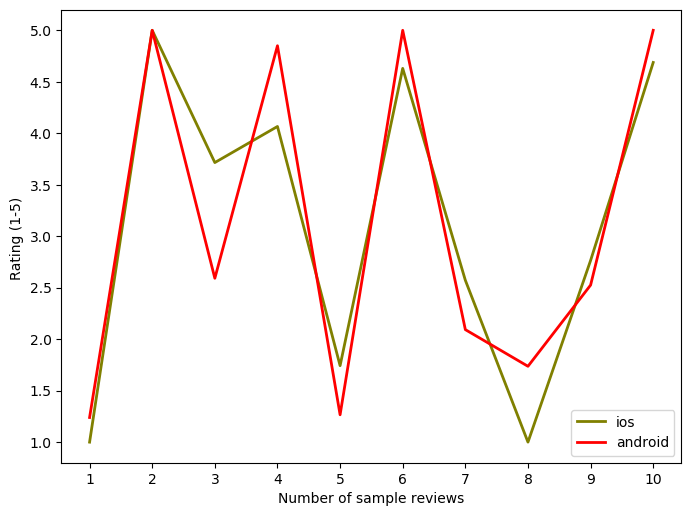

In [44]:
import matplotlib.pyplot as plt

w = 8
h = 6
d = 100
plt.figure(figsize=(w, h), dpi=d)

x= ['1','2','3','4','5','6','7','8','9','10']
plt.plot(x, iospredictions,marker='', color='olive', linewidth=2, label="ios")
plt.plot(x, samplepredictions, color='red', linewidth=2, label="android")
#plt.plot(x, samplerealratings, color='green', linewidth=1, linestyle='dashed',  label="real")
plt.ylabel('Rating (1-5) ')
plt.xlabel('Number of sample reviews')
plt.legend()
plt.show()

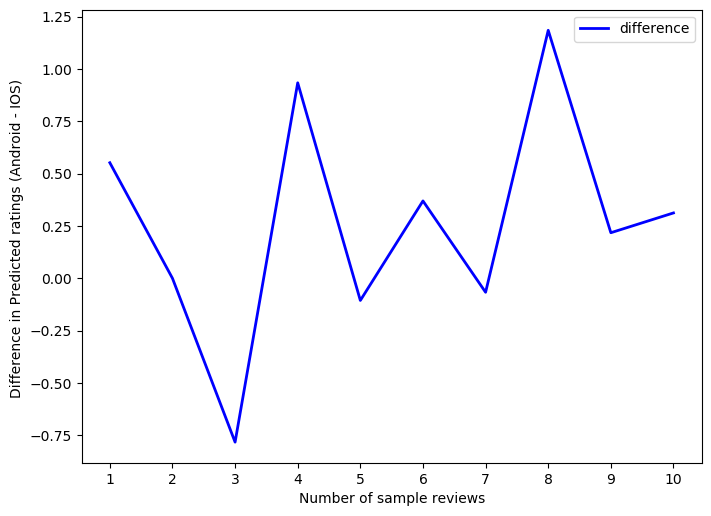

In [97]:

plt.figure(figsize=(w, h), dpi=d)

plt.plot(x, diff,marker='', color='blue', linewidth=2, label="difference")
plt.ylabel('Difference in Predicted ratings (Android - IOS) ')
plt.xlabel('Number of sample reviews')
plt.legend()
plt.show()


In [98]:
sum(diff)/len(diff)


0.26156098234951447

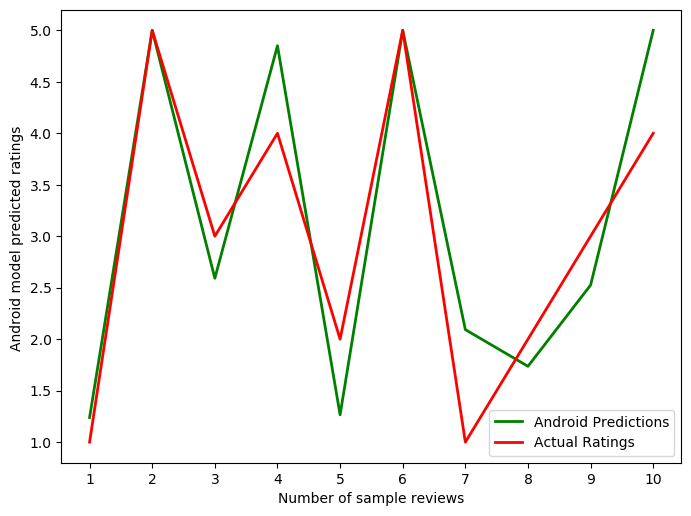

In [47]:

plt.figure(figsize=(w, h), dpi=d)

plt.plot(x, samplepredictions,marker='', color='green', linewidth=2, label="Android Predictions")
plt.plot(x, samplerealratings,marker='', color='red', linewidth=2, label="Actual Ratings")
plt.ylabel('Android model predicted ratings ')
plt.xlabel('Number of sample reviews')
plt.legend()
plt.show()

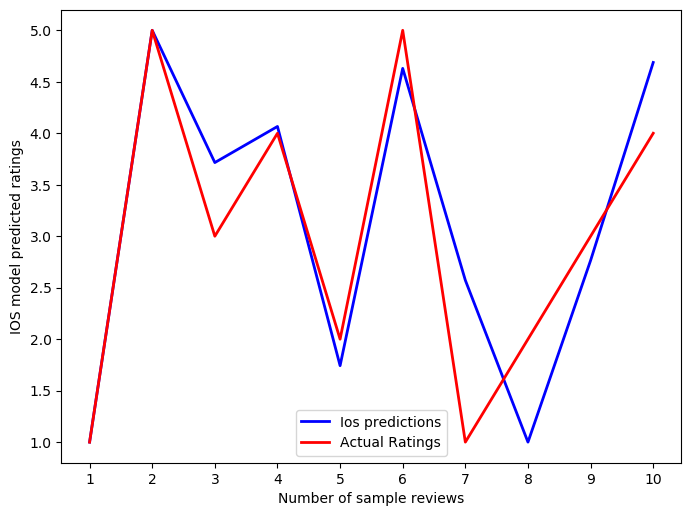

In [50]:

plt.figure(figsize=(w, h), dpi=d)

plt.plot(x, iospredictions,marker='', color='blue', linewidth=2, label="Ios predictions")
plt.plot(x, samplerealratings,marker='', color='red', linewidth=2, label="Actual Ratings")
plt.ylabel('IOS model predicted ratings')
plt.xlabel('Number of sample reviews')
plt.legend()
plt.show()

In [49]:

plt.figure(figsize=(w, h), dpi=d)
testsize = range(y_test)
plt.plot(x, y_test,marker='', color='blue', linewidth=2, label="Android Model predictions")
plt.plot(x, y_testreal,marker='', color='red', linewidth=2, label="Actual testdata Ratings")
plt.ylabel('Android model predicted ratings over test data')
plt.xlabel('Number of test reviews')
plt.legend()
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 800x600 with 0 Axes>